<a href="https://colab.research.google.com/github/vyng0/CS5530_Assignments/blob/main/Assignment3_NGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Sample Mean Glucose: 116.64
Sample Max Glucose: 183
Population Mean Glucose: 120.89453125
Population Max Glucose: 199


<Figure size 800x500 with 0 Axes>

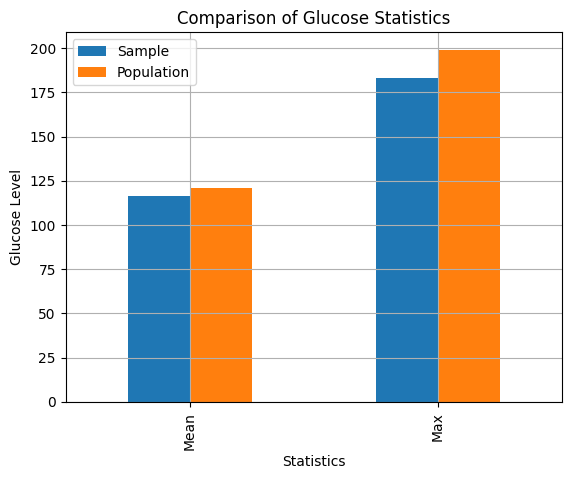

In [18]:
# a)

# Set seed and sample
np.random.seed(42)
sample_25 = df.sample(n=25)

# Sample
mean_glucose_sample = sample_25['Glucose'].mean()
max_glucose_sample = sample_25['Glucose'].max()
print("Sample Mean Glucose:", mean_glucose_sample)
print("Sample Max Glucose:", max_glucose_sample)

# Population
mean_glucose_pop = df['Glucose'].mean()
max_glucose_pop = df['Glucose'].max()
print("Population Mean Glucose:", mean_glucose_pop)
print("Population Max Glucose:", max_glucose_pop)

# Plot
plt.figure(figsize=(8, 5))
glucose = pd.DataFrame({
    'Statistics': ['Mean', 'Max'],
    'Sample': [mean_glucose_sample, max_glucose_sample],
    'Population': [mean_glucose_pop, max_glucose_pop]
}).set_index('Statistics')

glucose.plot(kind='bar')
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Level')
plt.grid(True)
plt.show()




*   Mean Glucose and and max Glucose values of the sample are both slighly lower than the population's.
*   This was expected because samples are much smaller and may not capture the outliers.



98th Percentile of Sample BMI: 40.248
98th Percentile of Population BMI: 47.52599999999996


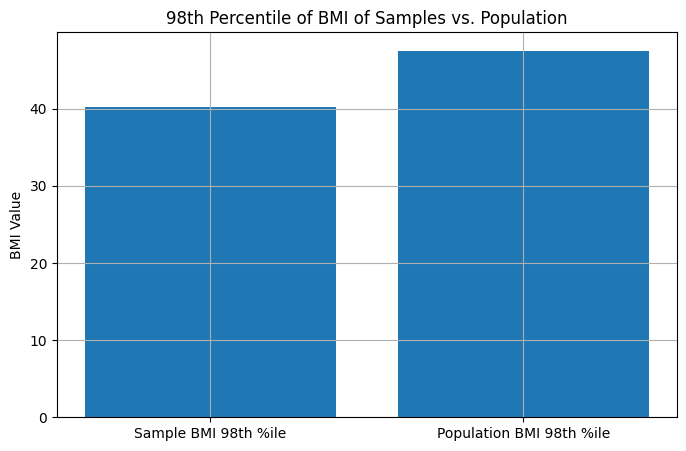

In [19]:
#b)
# Calculate percentiles
sample_bmi_98 = np.percentile(sample_25['BMI'], 98)
pop_bmi_98 = np.percentile(df['BMI'], 98)

print("98th Percentile of Sample BMI:", sample_bmi_98)
print("98th Percentile of Population BMI:", pop_bmi_98)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(['Sample BMI 98th %ile', 'Population BMI 98th %ile'], [sample_bmi_98, pop_bmi_98])
plt.ylabel('BMI Value')
plt.title('98th Percentile of BMI of Samples vs. Population')
plt.grid(True)
plt.show()




*   The 98the percentile of BMI of sample is lower than that of the population.



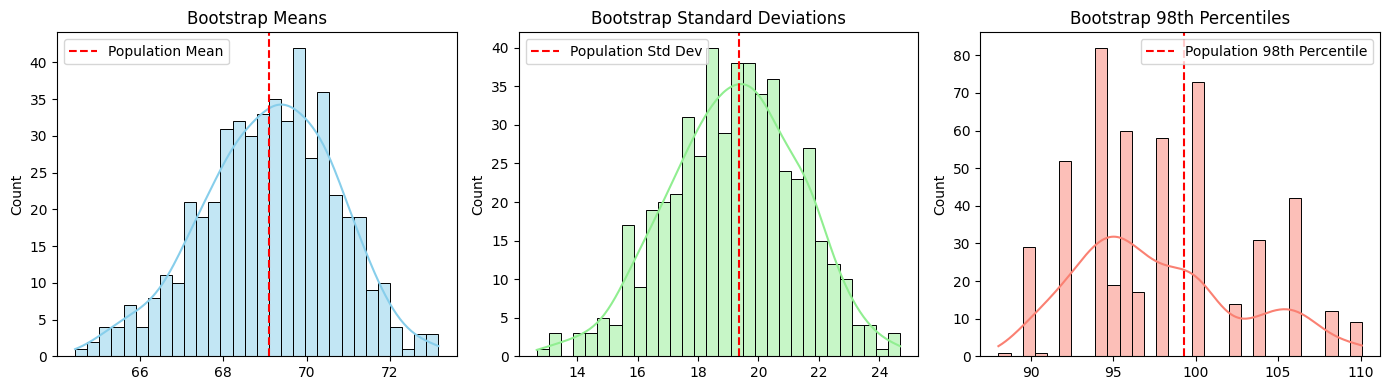

In [25]:
# c)
# Bootstrap setup
bootstrap_means = []
bootstrap_stds = []
bootstrap_p98 = []

# Perform 500 bootstrap samples (size 150)
for _ in range(500):
    sample = df['BloodPressure'].sample(n=150, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_p98.append(np.percentile(sample, 98))

# Convert results to DataFrame
bootstrap_df = pd.DataFrame({
    'Mean': bootstrap_means,
    'Std Dev': bootstrap_stds,
    '98th Percentile': bootstrap_p98
})
# Population statistics
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_p98 = np.percentile(df['BloodPressure'], 98)

# Average values from bootstrap samples
avg_mean = np.mean(bootstrap_means)
avg_std = np.mean(bootstrap_stds)
avg_p98 = np.mean(bootstrap_p98)

plt.figure(figsize=(14, 4))

# Mean
plt.subplot(1, 3, 1)
sns.histplot(bootstrap_means, kde=True, bins=30, color='skyblue')
plt.axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Bootstrap Means')
plt.legend()

# Standard Deviation
plt.subplot(1, 3, 2)
sns.histplot(bootstrap_stds, kde=True, bins=30, color='lightgreen')
plt.axvline(pop_std, color='red', linestyle='--', label='Population Std Dev')
plt.title('Bootstrap Standard Deviations')
plt.legend()

# 98th Percentile
plt.subplot(1, 3, 3)
sns.histplot(bootstrap_p98, kde=True, bins=30, color='salmon')
plt.axvline(pop_p98, color='red', linestyle='--', label='Population 98th Percentile')
plt.title('Bootstrap 98th Percentiles')
plt.legend()

plt.tight_layout()
plt.show()






1.   Mean Comparison
*   The bootstrap distribution of BloodPressure means is pretty symmetric and centered around 69.
*   The population mean (red line) aligns well with the center of the bootstrap distribution.
*   Bootstrao sample means provide a good estimate of the population mean.
2.   Standard Deviations Comparison
*   Most standard deviations are clustered near the population value 19.
*   The average of the bootstrap standard deviations also seems close to the population standard deviation.
3. 98th Percentiles Comparison
*   This distribution is more spread out and less symmetric, showing higher variability.
*   While the population 98th percentile is marked at around 100, the bootstrap 98th percentiles range widely from ~88 to ~110.








